# Final Project Report

* Class: DS 5100
* Student Name: Richard 'Ricky' Kuehn
* Student Net ID: fmt2tg
* This URL: https://github.com/richardkuehn/DS5100-finalproject-fmt2tg/blob/main/project_materials/Deliverables%26Scenarios.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/richardkuehn/DS5100-finalproject-fmt2tg/tree/main

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [ ]:
"""
import numpy as np
import pandas as pd

########## class 'Die' ##########
class Die:
    '''
    A class to represent a die.

    ...
    Attributes
    ---------------
    faces : np.ndarray
        faces of die
    weights : np.ndarray
        weights for the faces all set to 1

    Methods
    ----------
    chng_wght(face_val, new_wght):
        Changes weight of specified die face
    roll_die(rolls=1):
        Rolls die to produce values based on random sampling
    dataframe():
        Returns dataframe consisting of faces and weights
    '''
    # method 1: init Die
    def __init__(self, faces):
        '''
        Constructs attributes for the 'Die' object

        Parameters
        ---------------
        faces : np.ndarray
            faces of die

        Returns
        ---------------
        None
        '''    
        # check if numpy array
        if not isinstance(faces, np.ndarray):
            raise TypeError("'faces' argument must be numpy array")
        
        # check if integers or strings
        if faces.dtype not in (np.int32, np.int64) and faces.dtype.kind != 'U':
            raise TypeError("'faces' argument must contain integers or strings")
        
        # check if unique values
        if not (len(faces) == len(np.unique(faces))):
            raise TypeError("'faces' argument must contain unique values")
        
        # assign variable
        self.faces = faces

        # assign weights
        self.weights = np.ones(len(faces))
        
        # create private df
        self.__df = pd.DataFrame(self.weights, index=self.faces, columns=['weights'])
        self.__df.index.name = 'faces'

    # method 2: change weights
    def chng_wght(self, face_val, new_wght):
        '''
        Changes weight of specified die face

        Parameters
        ---------------
        face_val : int, str
            value of face to change
        new_wght : int, float, castable str
            new weight to change face to
        
        Returns
        ---------------
        face value '{face_val}' has been given new weight '{new_wght}'
        '''    
        # check for 'face_val' in __df
        if face_val not in self.__df.index:
            raise IndexError(f"'face_val' argument must be between {self.__df.index[0]} and {self.__df.index[-1]}")
        
        # check for int, float, or castable str
        if isinstance(new_wght, (int, float)):
            pass
        elif isinstance(new_wght, str):
            try: new_wght = float(new_wght)
            except ValueError: 
                raise TypeError("'new_wght' argument must be data type 'int', 'float', or castable 'str'") 
        
        # update __df with 'new_wght'
        self.__df.loc[face_val,'weights'] = new_wght
        self.weights = self.__df['weights'].values

        # inform of change
        return(f"face value '{face_val}' has been given new weight '{new_wght}'")

    # method 3: roll die one or more times
    def roll_die(self, rolls=1):
        '''
        Roll die to produce values based on random sampling

        Parameters
        ---------------
        rolls : int
            number of samples, defaults to 1

        Returns
        ---------------
        list with length 'rolls' consisting of face values from random sampling
        '''    
        # check 'rolls' is int and greater than 1
        if not isinstance(rolls, int) or rolls < 1:
            raise ValueError("'rolls' must be an integer greater than 0")
        
        # return result of rolls
        normalized = self.weights / self.weights.sum()
        return list(np.random.choice(self.faces, size=rolls, p=(normalized)))

    # method 4: show die's current state: returns copy of private die dataframe
    def dataframe(self):
        '''
        Returns dataframe consisting of faces and weights 

        Parameters
        ---------------
        None

        Returns
        ---------------
        dataframe consisting of faces and weights
        '''    
        return self.__df


########## class 'Game' ##########
class Game:
    '''
    A class to represent a game using 'Die' objects.

    ...
    Attributes
    ---------------
    dice : list
        list of 'Die' objects

    Methods
    ---------------
    play(rolls):
        Rolls list of 'Die' objects specified times
    play_results(form='wide'):
        Returns dataframe with results of play() in wide or narrow format
    '''
    # method 5: init Game
    def __init__(self, dice):
        '''
        Constructs attributes for the 'Game' object

        Parameters
        --------------- 
        dice : list
            - list of 'Die' objects

        Returns
        ---------------
        None
        '''    
        # check if 'dice' is a list
        if not isinstance(dice, list):
            raise ValueError("'dice' must be a list")
        
        # check if 'dice' contains Die objects
        for die in dice:
            if not isinstance(die, Die):
                raise ValueError("All items in 'dice' must be instances of the Die class")
        
        # assign variable
        self.dice = dice

    # method 6: roll dice and save to private df
    def play(self, rolls):
        '''
        Rolls list of 'Die' objects specified times

        Parameters
        --------------- 
        rolls : int
            number of samples

        Returns
        ---------------
        None
        '''
        # check if integer
        if type(rolls) != int:
            raise ValueError("'rolls' must be an integer")
        
        # create empty df with index from 1 to rolls
        self.__df2 = pd.DataFrame(index = range(1, rolls + 1))
        self.__df2.index.name = 'roll #'
        
        # iterate roll_die over dice
        # this needs to be making the columns using the name of the die
        for i, x in enumerate(self.dice, start = 1):
            self.__df2[f'die{i}'] = x.roll_die(rolls)

    # method 7: results of .play
    def play_results(self, form = 'wide'):
        '''
        Returns dataframe with results of play() in wide or narrow format

        Parameters
        ---------------
        form : str
            defaults to 'wide', but accepts 'narrow' to stack dataframe

        Returns
        ---------------
        - if form is wide, wide dataframe of play results
        - if form is narrow, narrow dataframe of play results
        '''
        if form not in ('wide', 'narrow'):
            raise ValueError("'form' must equal 'wide' or 'narrow'")
        if (form == 'wide'):
            return self.__df2
        if (form == 'narrow'):
            return self.__df2.stack().to_frame(name='die value')


########## class 'Analyzer' ##########
class Analyzer:
    '''
    A class to represent analysis using a 'Game' object.

    ...
    Attributes
    ---------------
    play_results : pd.DataFrame
        dataframe of object's Game.play_results()
    face_array : np.ndarray
        array of faces from first die of object's Game.dice()

    Methods
    ---------------
    jackpot():
        Returns statement with jackpot counts
    face_count():
        Returns dataframe with face counts
    combo_count():
        Returns dataframe with combination counts
    perm_count():
        Returns dataframe with permutation counts
    '''
    # method 8: init Analyzer
    def __init__(self, game):
        '''
        Constructs attributes for the 'Analyzer' object

        Parameters
        --------------- 
        game : 'Game' object
            'Game' object

        Returns
        ---------------
        None
        '''
        # check that 'game' is Game object
        if not isinstance(game, Game):
            raise ValueError("'game' must be instance of the Game class")
        
        self.play_results = game.play_results()
        self.faces_array = game.dice[0].faces

    # method 9: jackpot where all faces are the same
    def jackpot(self):
        '''
        Returns statement with jackpot counts

        Parameters
        --------------- 
        None

        Returns
        ---------------
        count of Jackpots
        '''
        # add +1 to 'i' if only 1 unique value
        i = 0
        for x, row in self.play_results.iterrows():
            if row.nunique() == 1:
                i += 1

        # return count of 
        return i

    # method 10: count occurence of faces in each roll
    def face_count(self):
        '''
        Returns dataframe with face counts

        Parameters
        --------------- 
        None

        Returns
        ---------------
        dataframe consisting of value counts for faces in each round of rolls
        '''
        # create zeros dataframe with index = rolls and columns = faces
        counts_df = pd.DataFrame(columns=self.faces_array, index=self.play_results.index)
        counts_df = counts_df.infer_objects().fillna(0)
        counts_df.columns.name = 'faces_counts'

        # iterate through rows in 'self.play_results'
        for index, row in self.play_results.iterrows():
        # count occurrence of each face
            for face in row:
                counts_df.at[index, face] += 1

        # return updated df
        return counts_df.astype(int)

    # method 11: count combinations of rolls
    def combo_count(self):
        '''
        Returns dataframe with combination counts

        Parameters
        --------------- 
        None

        Returns
        ---------------
        dataframe consisting of the count of face combinations (independent of order)
        '''
        combos = [self.play_results.iloc[x].values.tolist() for x in range(0, len(self.play_results))]
        combo_sort = [sorted(x) for x in combos]
        df_sort = pd.DataFrame(combo_sort)
        df_sort.columns = [f'die{i}' for i in range(1, (len(df_sort.columns) + 1))]
        df3 = df_sort.value_counts(ascending=True)
        return df3.to_frame(name='combo_counts')
        
    # method 12: count permutations of rolls
    def perm_count(self):
        '''
        Returns dataframe with permutation counts

        Parameters
        --------------- 
        None

        Returns
        ---------------
        dataframe consisting of the count of face permutations (dependent of order)
        '''
        # essentially combo count but order matters --> just use value_count
        perms = self.play_results.value_counts(ascending=True)
        return perms.to_frame(name='perm_counts')
"""

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [ ]:
"""
import unittest
import numpy as np
import pandas as pd
from montecarlo import Die, Game, Analyzer

########## TEST ##########
class MonteCarloTestSuite(unittest.TestCase):
    def test_01_die_init(self):
        # create instance
        dieA = Die(np.array([1,2,3,4,5,6]))
        
        message = "'weights' should be instance of np.ndarray"
        self.assertIsInstance(dieA.weights, np.ndarray, message)
    
    def test_02_chng_wght(self):
        # create instance
        dieA = Die(np.array([1,2,3,4,5,6]))
        before_l = len(dieA.weights.copy())
        before = dieA.weights.copy()
        dieA.chng_wght(4,2)
        after_l = len(dieA.weights)
        after = dieA.weights

        self.assertEqual(before_l, after_l, "length of 'weights' should remain constant")
        self.assertFalse(np.array_equal(before, after), "'weights' should change after calling method 'chng_wght'")
    
    def test_03_roll_die(self):
        # create instance
        dieA = Die(np.array([1,2,3,4,5,6]))

        message = "method should return a list"
        self.assertIsInstance(dieA.roll_die(), list, message)
    
    def test_04_dataframe(self):
        # create instance
        dieA = Die(np.array([1,2,3,4,5,6]))

        message = "method should return a pd.DataFrame"
        self.assertIsInstance(dieA.dataframe(), pd.DataFrame, message)
    
    def test_05_game_init(self):
        # create instances
        dieA = Die(np.array([1,2,3,4,5,6]))
        dieB = Die(np.array([1,2,3,4,5,6]))
        dieA.chng_wght(3,4)
        dieB.chng_wght(4,3)
        dice=[dieA, dieB]
        game = Game(dice)

        message = "'dice' should be instance of list"
        self.assertIsInstance(game.dice, list, message)
    
    def test_06_play(self):
        # create instances
        dieA = Die(np.array([1,2,3,4,5,6]))
        dieB = Die(np.array([1,2,3,4,5,6]))
        dieA.chng_wght(3,4)
        dieB.chng_wght(4,3)
        dice=[dieA, dieB]
        game = Game(dice)
        game.play(10)

        message = "'__df2' should be instance of pd.DataFrame"
        self.assertIsInstance(game._Game__df2, pd.DataFrame, message)
    
    def test_07_play_results(self):
        # create instances
        dieA = Die(np.array([1,2,3,4,5,6]))
        dieB = Die(np.array([1,2,3,4,5,6]))
        dieA.chng_wght(3,4)
        dieB.chng_wght(4,3)
        dice=[dieA, dieB]
        game = Game(dice)
        game.play(10)
        
        message = "method should return a pd.DataFrame"
        self.assertIsInstance(game.play_results(), pd.DataFrame, message)
    
    def test_08_analyzer_init(self):
        # create instances
        dieA = Die(np.array([1,2,3,4,5,6]))
        dieB = Die(np.array([1,2,3,4,5,6]))
        dieA.chng_wght(3,4)
        dieB.chng_wght(4,3)
        dice=[dieA, dieB]
        game = Game(dice)
        game.play(10)
        analyzed = Analyzer(game)

        message = "'play_results' should instance of a pd.DataFrame"
        self.assertIsInstance(analyzed.play_results, pd.DataFrame, message)
    
    def test_09_jackpot(self):
        # create instances
        dieA = Die(np.array([1,2,3,4,5,6]))
        dieB = Die(np.array([1,2,3,4,5,6]))
        dieA.chng_wght(3,4)
        dieB.chng_wght(4,3)
        dice=[dieA, dieB]
        game = Game(dice)
        game.play(10)
        analyzed = Analyzer(game)

        message = "method should return an int"
        self.assertIsInstance(analyzed.jackpot(), int, message)
    
    def test_10_face_count(self):
        # create instances
        dieA = Die(np.array([1,2,3,4,5,6]))
        dieB = Die(np.array([1,2,3,4,5,6]))
        dieA.chng_wght(3,4)
        dieB.chng_wght(4,3)
        dice=[dieA, dieB]
        game = Game(dice)
        game.play(10)
        analyzed = Analyzer(game)

        message = "method should return a pd.DataFrame"
        self.assertIsInstance(analyzed.face_count(), pd.DataFrame, message)
    
    def test_11_combo_count(self):
        # create instances
        dieA = Die(np.array([1,2,3,4,5,6]))
        dieB = Die(np.array([1,2,3,4,5,6]))
        dieA.chng_wght(3,4)
        dieB.chng_wght(4,3)
        dice=[dieA, dieB]
        game = Game(dice)
        game.play(10)
        analyzed = Analyzer(game)

        message = "method should return a pd.DataFrame"
        self.assertIsInstance(analyzed.combo_count(), pd.DataFrame, message)

    def test_12_perm_count(self):
        # create instances
        dieA = Die(np.array([1,2,3,4,5,6]))
        dieB = Die(np.array([1,2,3,4,5,6]))
        dieA.chng_wght(3,4)
        dieB.chng_wght(4,3)
        dice=[dieA, dieB]
        game = Game(dice)
        game.play(10)
        analyzed = Analyzer(game)

        message = "method should return a pd.DataFrame"
        self.assertIsInstance(analyzed.perm_count(), pd.DataFrame, message)

########## Run TEST ##########
if __name__ == '__main__':
    unittest.main(verbosity=3)
"""

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

In [ ]:
"""
(programming_env) rickykuehn ~/Desktop/UVA/Summer/Programming/DS5100-finalproject-fmt2tg >> /Users/rickykuehn/miniforge3/envs/programming_env/bin/python /Users/rickykuehn/Desktop/UVA/Summer/Programming/DS5100-finalproject-fmt2tg/montecarlo_test.py
Welcome to Monte Carlo!
test_01_die_init (__main__.MonteCarloTestSuite.test_01_die_init) ... ok
test_02_chng_wght (__main__.MonteCarloTestSuite.test_02_chng_wght) ... ok
test_03_roll_die (__main__.MonteCarloTestSuite.test_03_roll_die) ... ok
test_04_dataframe (__main__.MonteCarloTestSuite.test_04_dataframe) ... ok
test_05_game_init (__main__.MonteCarloTestSuite.test_05_game_init) ... ok
test_06_play (__main__.MonteCarloTestSuite.test_06_play) ... ok
test_07_play_results (__main__.MonteCarloTestSuite.test_07_play_results) ... ok
test_08_analyzer_init (__main__.MonteCarloTestSuite.test_08_analyzer_init) ... ok
test_09_jackpot (__main__.MonteCarloTestSuite.test_09_jackpot) ... ok
test_10_face_count (__main__.MonteCarloTestSuite.test_10_face_count) ... ok
test_11_combo_count (__main__.MonteCarloTestSuite.test_11_combo_count) ... ok
test_12_perm_count (__main__.MonteCarloTestSuite.test_12_perm_count) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.008s

OK
"""

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import montecarlo.montecarlo as montecarlo
from montecarlo import Die, Game, Analyzer

Welcome to Monte Carlo!


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
# help(montecarlo)
help(montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game

    class Analyzer(builtins.object)
     |  Analyzer(game)
     |
     |  A class to represent analysis using a 'Game' object.
     |
     |  ...
     |  Attributes
     |  ---------------
     |  play_results : pd.DataFrame
     |      dataframe of object's Game.play_results()
     |  face_array : np.ndarray
     |      array of faces from first die of object's Game.dice()
     |
     |  Methods
     |  ---------------
     |  jackpot():
     |      Returns jackpot counts
     |  face_count():
     |      Returns dataframe with face counts
     |  combo_count():
     |      Returns dataframe with combination counts
     |  perm_count():
     |      Returns dataframe with permutation counts
     |
     |  Methods defined here:
     |
     |  __init__(self, game)
     |      Constructs attributes for the 'Analyzer' object
     |
    

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/richardkuehn/DS5100-finalproject-fmt2tg/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

In [ ]:
"""
(programming_env) rickykuehn ~/Desktop/UVA/Summer/Programming/DS5100-finalproject-fmt2tg >> pip install -e .
Obtaining file:///Users/rickykuehn/Desktop/UVA/Summer/Programming/DS5100-finalproject-fmt2tg
  Preparing metadata (setup.py) ... done
Requirement already satisfied: Pandas>=2.2.2 in /Users/rickykuehn/miniforge3/envs/programming_env/lib/python3.12/site-packages (from montecarlo==0.1) (2.2.2)
Requirement already satisfied: Numpy>=1.26.4 in /Users/rickykuehn/miniforge3/envs/programming_env/lib/python3.12/site-packages (from montecarlo==0.1) (1.26.4)
Requirement already satisfied: python-dateutil>=2.8.2 in /Users/rickykuehn/miniforge3/envs/programming_env/lib/python3.12/site-packages (from Pandas>=2.2.2->montecarlo==0.1) (2.9.0)
Requirement already satisfied: pytz>=2020.1 in /Users/rickykuehn/miniforge3/envs/programming_env/lib/python3.12/site-packages (from Pandas>=2.2.2->montecarlo==0.1) (2024.1)
Requirement already satisfied: tzdata>=2022.7 in /Users/rickykuehn/miniforge3/envs/programming_env/lib/python3.12/site-packages (from Pandas>=2.2.2->montecarlo==0.1) (2024.1)
Requirement already satisfied: six>=1.5 in /Users/rickykuehn/miniforge3/envs/programming_env/lib/python3.12/site-packages (from python-dateutil>=2.8.2->Pandas>=2.2.2->montecarlo==0.1) (1.16.0)
Installing collected packages: montecarlo
  Running setup.py develop for montecarlo
Successfully installed montecarlo-0.1
"""

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [3]:
# Imports
import pandas as pd
import numpy as np

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [4]:
# create fair coin
fair_coin = Die(np.array(['H', 'T']))

# create unfair coin, change weights
unfair_coin = Die(np.array(['H', 'T']))
unfair_coin.chng_wght('H', 5)

# print weights
print("fair coin weights:" + str(fair_coin.weights))
print("unfair coin weights:" + str(unfair_coin.weights))

fair coin weights:[1. 1.]
unfair coin weights:[5. 1.]


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [5]:
# create coins
coins = [fair_coin, unfair_coin]

# create game with coins
game = Game(coins)

# play 1000 games
game.play(1000)

game.play_results()

,die1,die2
roll #,,
1,H,H
2,T,H
3,T,H
4,T,T
5,H,H
...,...,...
996,T,H
997,H,H
998,H,T


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [6]:
# create list with 3 coins
coins_3 = [fair_coin, unfair_coin, unfair_coin]

# create new game with 3 coins
game2 = Game(coins_3)

# play 1000 games
game2.play(1000)

game2.play_results()

,die1,die2,die3
roll #,,,
1,T,H,H
2,T,T,H
3,T,H,H
4,H,H,H
5,T,H,H
...,...,...,...
996,H,H,H
997,T,H,T
998,H,H,H


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [7]:
# analyze each game
analyzed_game1 = Analyzer(game)
analyzed_game2 = Analyzer(game2)

# print raw frequency of jackpots
print("First game jackpots: " + str(analyzed_game1.jackpot()))
print("Second game jackpots: " + str(analyzed_game2.jackpot()))

First game jackpots: 490
Second game jackpots: 371


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [8]:
# print relative frequency of jackpots
print("Relative frequency of jackpots for the first game: " + str(analyzed_game1.jackpot() / 1000))
print("Relative frequency of jackpots for the second game: " + str(analyzed_game2.jackpot() / 1000))

Relative frequency of jackpots for the first game: 0.49
Relative frequency of jackpots for the second game: 0.371


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

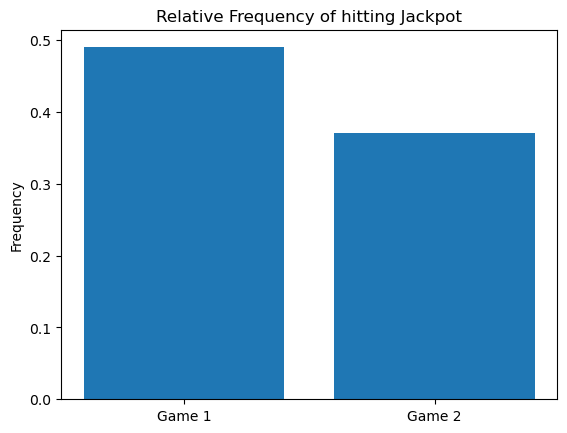

In [9]:
import matplotlib.pyplot as plt

# create relative frequency variables
jackpot_freq1 = analyzed_game1.jackpot() / 1000
jackpot_freq2 = analyzed_game2.jackpot() / 1000

# plot
plt.bar(['Game 1', 'Game 2'], [jackpot_freq1, jackpot_freq2])

# edit title and y-axis label
plt.title('Relative Frequency of hitting Jackpot')
plt.ylabel('Frequency')

plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [10]:
# create three die
dieA = Die(np.array([1,2,3,4,5,6]))
dieB = Die(np.array([1,2,3,4,5,6]))
dieC = Die(np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [11]:
# change weight of sixth side on third die
dieC.chng_wght(6, 5)
dieC.dataframe()

,weights
faces,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [12]:
# change weight of first side on second die
dieB.chng_wght(1, 5)
dieB.dataframe()

,weights
faces,
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [13]:
# create dice
dice1 = [dieA, dieA, dieA, dieA, dieA]

# create game with dice
game1 = Game(dice1)

# play 10000 games
game1.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [14]:
# create dice
dice2 = [dieA, dieA, dieA, dieB, dieC]

# create game with dice
game2 = Game(dice2)

# play 10000 games
game2.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [15]:
# analyze games
analyzed_game1 = Analyzer(game1)
analyzed_game2 = Analyzer(game2)

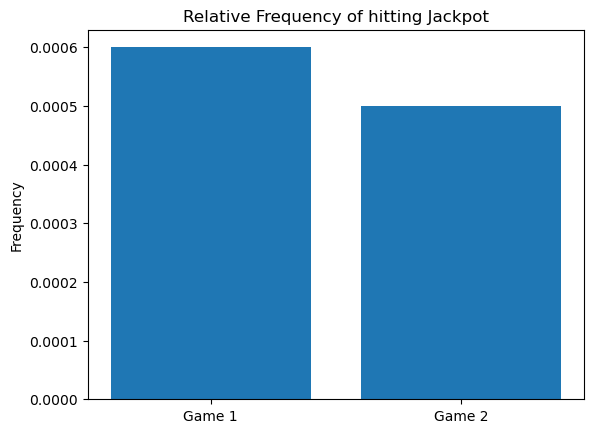

In [16]:
import matplotlib.pyplot as plt

# create relative frequency variables
jackpot_freq1 = analyzed_game1.jackpot() / 10000
jackpot_freq2 = analyzed_game2.jackpot() / 10000

# plot
plt.bar(['Game 1', 'Game 2'], [jackpot_freq1, jackpot_freq2])

# edit title and y-axis label
plt.title('Relative Frequency of hitting Jackpot')
plt.ylabel('Frequency')

plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [17]:
# import and create alphabet dataframe
alpha_df = pd.read_csv('english_letters.txt', sep=' ', header=None)
alpha_df.columns = ('letter', 'weight')
alpha_df

,letter,weight
0,E,529117365
1,T,390965105
2,A,374061888
3,O,326627740
4,I,320410057
5,N,313720540
6,S,294300210
7,R,277000841
8,H,216768975
9,L,183996130


In [18]:
# extract faces from dataframe
faces = np.array(list(alpha_df['letter']))

# create die
die_alpha = Die(faces)

# extract faces and weights
new_weights = [[row['letter'], row['weight']] for i, row in alpha_df.iterrows()]

# change weights
for w in new_weights:
    die_alpha.chng_wght(w[0], w[1])

die_alpha.dataframe()

,weights
faces,
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [19]:
# create dice
dice = [die_alpha, die_alpha, die_alpha, die_alpha]

# create game with dice
game = Game(dice)

# play 1000 games
game.play(1000)

game.play_results()

,die1,die2,die3,die4
roll #,,,,
1,S,S,D,O
2,E,C,R,H
3,F,H,O,T
4,T,I,E,R
5,I,L,N,R
...,...,...,...,...
996,S,F,M,E
997,I,R,I,A
998,S,I,G,R


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [20]:
# analyze
analyzed = Analyzer(game)

# count permutations
perm_df = analyzed.perm_count()

# reset index to extract permutations 
perm_df = perm_df.reset_index()

# create column with concatenated permutations
perm_df['permutation'] = perm_df['die1'] + perm_df['die2'] + perm_df['die3'] + perm_df['die4']
perm_df

,die1,die2,die3,die4,perm_counts,permutation
0,A,A,A,E,1,AAAE
1,O,R,D,R,1,ORDR
2,O,R,H,A,1,ORHA
3,O,R,R,I,1,ORRI
4,O,S,C,P,1,OSCP
...,...,...,...,...,...,...
987,E,I,A,E,2,EIAE
988,E,I,I,L,2,EIIL
989,A,E,N,E,2,AENE
990,T,E,A,N,2,TEAN


In [21]:
# import and create scrabble_words dataframe
scrabble_words = pd.read_csv('scrabble_words.txt', header=None)
scrabble_words.columns = ['words']
scrabble_words.head(5)

,words
0,AA
1,AAH
2,AAHED
3,AAHING
4,AAHS


In [22]:
# put words and permutations into sets
words_set = set(scrabble_words['words'])
perm_set = set(perm_df['permutation'])

# find length of perm_set before and after subtractin words_set
len_before = len(perm_set)
len_after = len(perm_set - words_set)

# calculate total words remove
perm_in_words = len_before - len_after

print("There were " + str(perm_in_words) + " permutations that were words!")

There were 54 permutations that were words!


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [23]:
# create dice
dice = [die_alpha, die_alpha, die_alpha, die_alpha, die_alpha]

# create game with dice
game = Game(dice)

# play game 1000 times
game.play(1000)

game.play_results()

,die1,die2,die3,die4,die5
roll #,,,,,
1,A,U,N,A,W
2,H,N,S,M,M
3,N,E,D,N,E
4,N,O,W,I,P
5,O,I,S,T,E
...,...,...,...,...,...
996,E,I,P,C,T
997,M,V,A,G,C
998,E,T,N,E,T


In [24]:
# analyze
analyzed2 = Analyzer(game)

# count permutations
perm_df2 = analyzed2.perm_count()

# reset index to extract permuations 
perm_df2 = perm_df2.reset_index()

# create column with concatenated permutations
perm_df2['permutation'] = perm_df2['die1'] + perm_df2['die2'] + perm_df2['die3'] + perm_df2['die4'] + perm_df2['die5']

perm_df2

,die1,die2,die3,die4,die5,perm_counts,permutation
0,A,A,A,R,T,1,AAART
1,O,L,O,O,T,1,OLOOT
2,O,L,S,V,E,1,OLSVE
3,O,L,U,N,W,1,OLUNW
4,O,M,I,P,Y,1,OMIPY
...,...,...,...,...,...,...,...
995,G,E,U,E,I,1,GEUEI
996,G,F,O,N,I,1,GFONI
997,G,I,A,E,S,1,GIAES
998,F,R,G,A,N,1,FRGAN


In [25]:
# put words and permutations into sets
words_set = set(scrabble_words['words'])
perm_set2 = set(perm_df2['permutation'])

# find length of perm_set before and after subtractin words_set
len_before2 = len(perm_set2)
len_after2 = len(perm_set2 - words_set)

# calculate total words remove
perm_in_words2 = len_before2 - len_after2

print("There were " + str(perm_in_words2) + " permuations that were words!")

There were 6 permuations that were words!
